In [8]:
import pandas as pd
import numpy as np
import torch
from sklearn.manifold import TSNE
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [9]:
records_filename = "../src/records.csv"
p = 0.05
df = pd.read_csv(
         records_filename,
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)
df.head()

,gc1.weight,gc1.bias,gc2.weight,gc2.bias,test_loss,test_acc
0,"[0.17001837491989136, 0.09082416445016861, 0.0...","[0.1885671764612198, 0.166299507021904, 0.1284...","[-1.074949026107788, -1.7430163621902466, 1.65...","[0.13336946070194244, -1.0270949602127075, 1.1...",0.727133,0.813
1,"[-0.2845044732093811, 0.1294974833726883, 0.04...","[0.13725435733795166, 0.22065915167331696, 0.1...","[-1.7383198738098145, 1.5353929996490479, 1.29...","[0.2907800078392029, -0.16448460519313812, 0.0...",0.719810,0.834
2,"[0.02899944968521595, -0.06093670427799225, 0....","[0.1832529455423355, 0.1687101274728775, 0.192...","[-1.901804804801941, 0.6951396465301514, -1.68...","[0.5695918202400208, 0.17722274363040924, -0.3...",0.727759,0.827
3,"[-0.10289595276117325, -0.13282547891139984, 0...","[0.12999527156352997, 0.17509905993938446, 0.2...","[2.2450180053710938, -2.0247273445129395, 0.64...","[0.44551557302474976, -0.3512481451034546, -0....",0.748393,0.834
4,"[-0.028015989810228348, -0.1152723953127861, -...","[0.1567545235157013, 0.14801125228405, 0.13872...","[-0.6233063340187073, -0.33805176615715027, 0....","[-0.022944502532482147, -0.16038575768470764, ...",0.729650,0.834


In [10]:
df.memory_usage(index=True)

Index           80
gc1.weight    1520
gc1.bias      1520
gc2.weight    1520
gc2.bias      1520
test_loss     1520
test_acc      1520
dtype: int64

In [11]:
X = np.array([ast.literal_eval(i) for i in df['gc1.weight']])

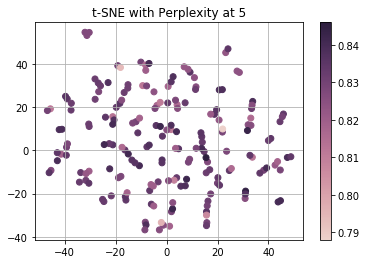

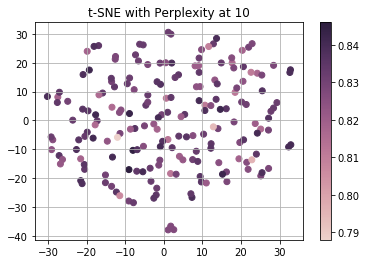

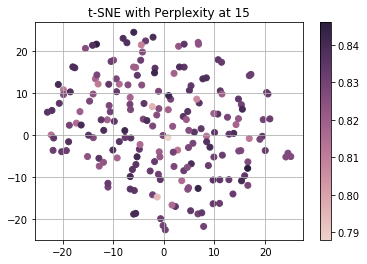

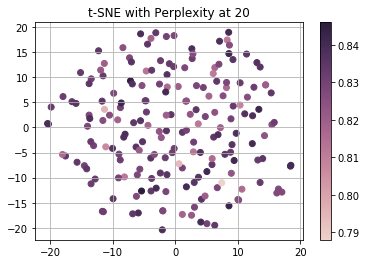

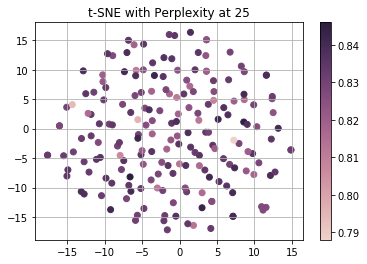

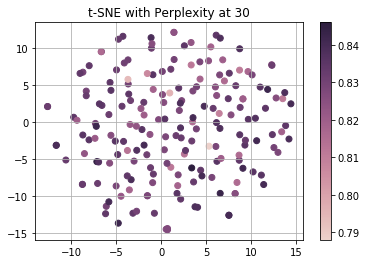

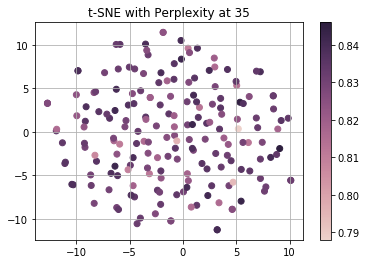

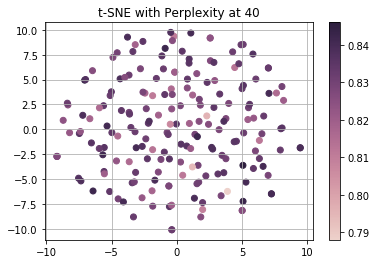

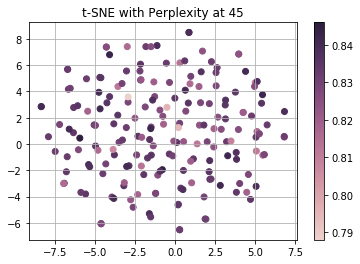

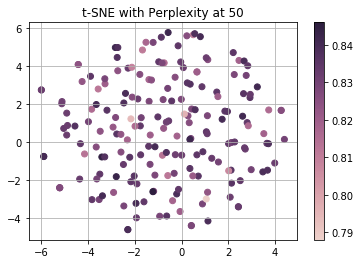

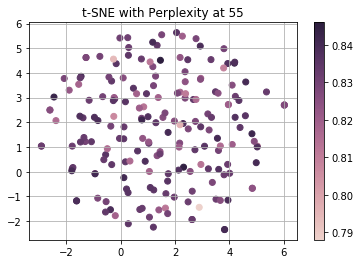

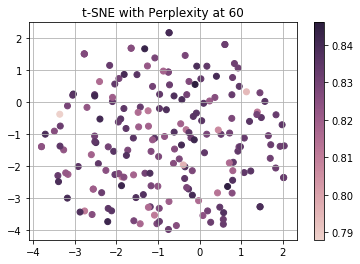

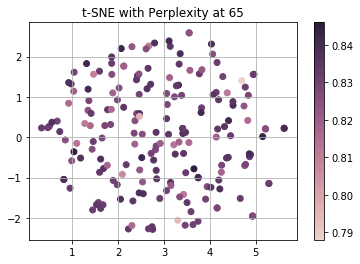

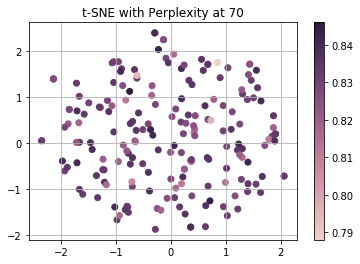

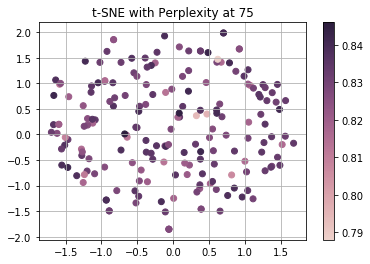

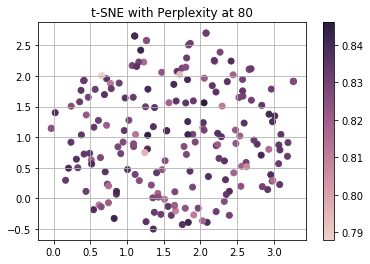

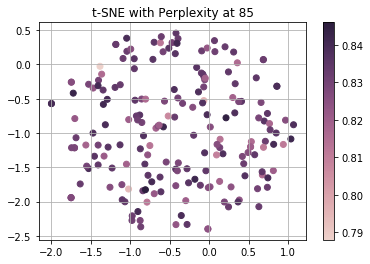

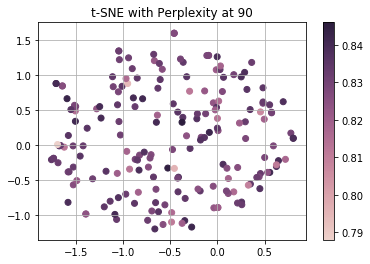

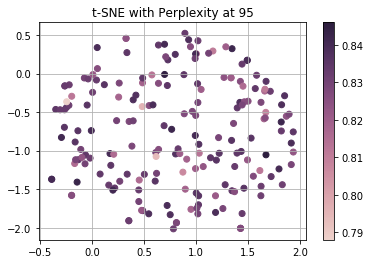

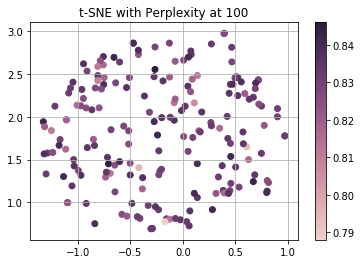

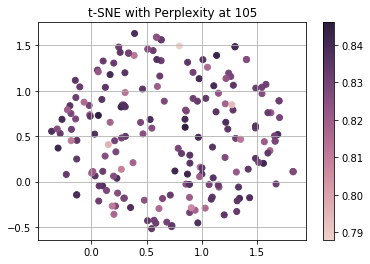

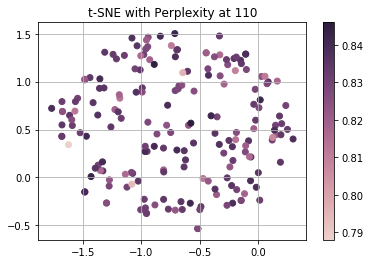

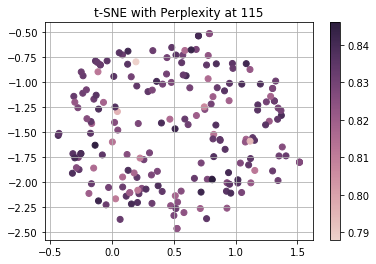

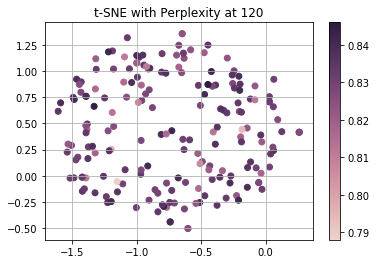

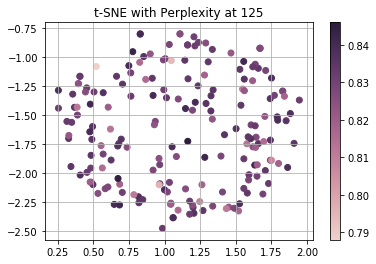

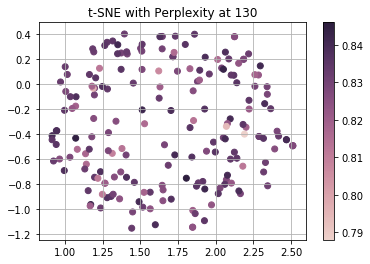

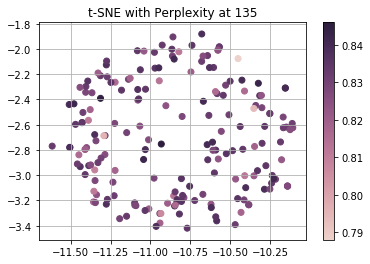

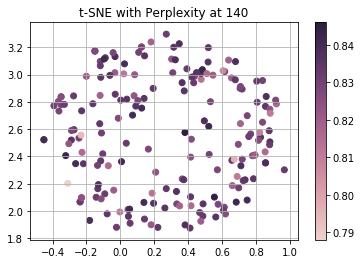

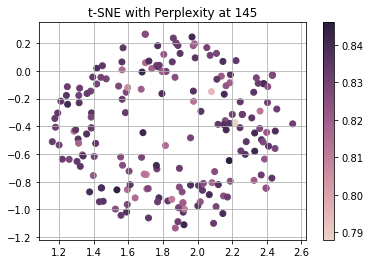

In [12]:
perplexity_range = range(5, 150, 5)
for p in perplexity_range:
    tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=p)
    Y = tsne.fit_transform(X)
    cmap = sns.cubehelix_palette(as_cmap=True)

    f, ax = plt.subplots()
    points = ax.scatter(Y[:,0], Y[:, 1], c=df['test_acc'], cmap=cmap)
    _ = ax.grid()
    plt.title(f't-SNE with Perplexity at {p}')
    f.colorbar(points)
    plt.show()